In [110]:
import os
import re
import csv
import glob
import pandas as pd
from enum import Enum

import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

column_names = ['CURRENT_SAC_END_TIME', 'CURRENT_SAC_AVG_VELOCITY', 'CURRENT_SAC_PEAK_VELOCITY', 'CURRENT_SAC_DURATION']
column_names_fix = ['CURRENT_FIX_END', 'CURRENT_FIX_DURATION']
column_dict = {}
skip_val = ['.']

step = 30000

class PType(Enum):
    Healthy = 'Healthy'
    Treat = 'Treat'
    Slut = 'Stut'

class Health(Enum):
    Healthy = "Без заикания"
    Stut = "С заиканием"
    Treat = "Во время лечения"

In [103]:
class EyeDat:
    def __init__(self,health,exp,trial):
        fnames = glob.glob("./Eyetrack//{}/*/Fix*_{}*".format(health,exp))
        df_s = [pd.read_csv(n,delimiter='\t',decimal=',')for n in fnames]
        lst = []
        for df in df_s:
            lst.append(df[(df["CURRENT_FIX_END"] // step) % 3 == trial])
        df = pd.concat(lst)
        df["NEXT_FIX_DISTANCE"] = [ x.replace(',', '.') for x in df["NEXT_FIX_DISTANCE"] ]
        df["NEXT_FIX_DISTANCE"].astype(float)
        self.df = df
    
    def hist_calc(self):
        pass
        

In [104]:
# df["NEXT_FIX_DISTANCE"].astype(float)

In [105]:
df = EyeDat("Во время лечения",3,1).df

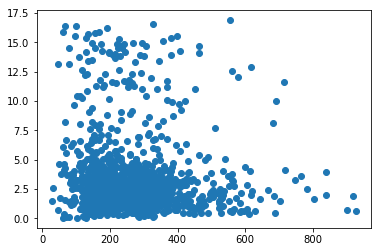

In [112]:
plt.scatter(df["CURRENT_FIX_DURATION"],df["NEXT_FIX_DISTANCE"]);

In [113]:
plt.show()